In [1]:
# Learning Curve : Learnign Curve allow us to check whtehr the addition of trainng data leads to benit. 

import pandas as pd
import numpy as np

train = pd.read_csv('Titanic.csv')

train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train = train.drop(['Cabin','Ticket','Last Name','First Name','Unnamed: 0'],axis=1)

train['Pclass'] = train['Pclass'].apply(str)


# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
 for_dummy = train.pop(col)
 train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
    
X = train.drop(['Survived'],axis=1)
y = train['Survived']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [4]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=7)
parameter_grid = np.array([20,40,90,130,150])
train_score,valid_scores = validation_curve(classifier,X,y,'n_estimators',parameter_grid,cv=5)

Text(0, 0.5, 'Accuracy')

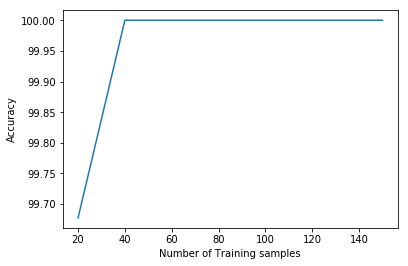

In [7]:
import matplotlib.pyplot as plt

plt.plot(parameter_grid,100* np.average(train_score,axis=1))
plt.xlabel("Number of Training samples")
plt.ylabel("Accuracy")
